# Photobleach correction rationale and figures

---

### For best results, save a local copy to your machine, then upload the final versions
-> Needs to be tested on cluster

In [1]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend
import os
from decode_lab_code.calcium_imaging import preprocessing_utils as pu

In [2]:
# define movie paths
#fname = r'/Users/js0403/ophysdata/Trevor_data/Neuron/750K2_200ms_4XSum_video_RedGreen_depolar002_neuron.tif'
#fname = r'/Users/js0403/ophysdata/Trevor_data/750K1_200ms_video_RedGreen003.tif'
#fname = r'/Users/js0403/slice_imaging/NoSR101/_Process_45_/stack1/frame_t_0.ets - Acquisition_spatDownSampledx2.tif'

fname = r'/Users/js0403/ophysdata/Manny/Manny_WSB_10-6-23_A1_20X_gfp.tif'

# frame rate as taken from the .txt file
#fr = 12

#### Load data and demonstrate photobleach effect

In [3]:
movie_orig = tifffile.memmap(fname)
movie_orig.shape

if len(movie_orig.shape)>3:
    movie_orig = movie_orig[:,1,:,:]
    

IndexError: index 497 is out of bounds for axis 0 with size 366

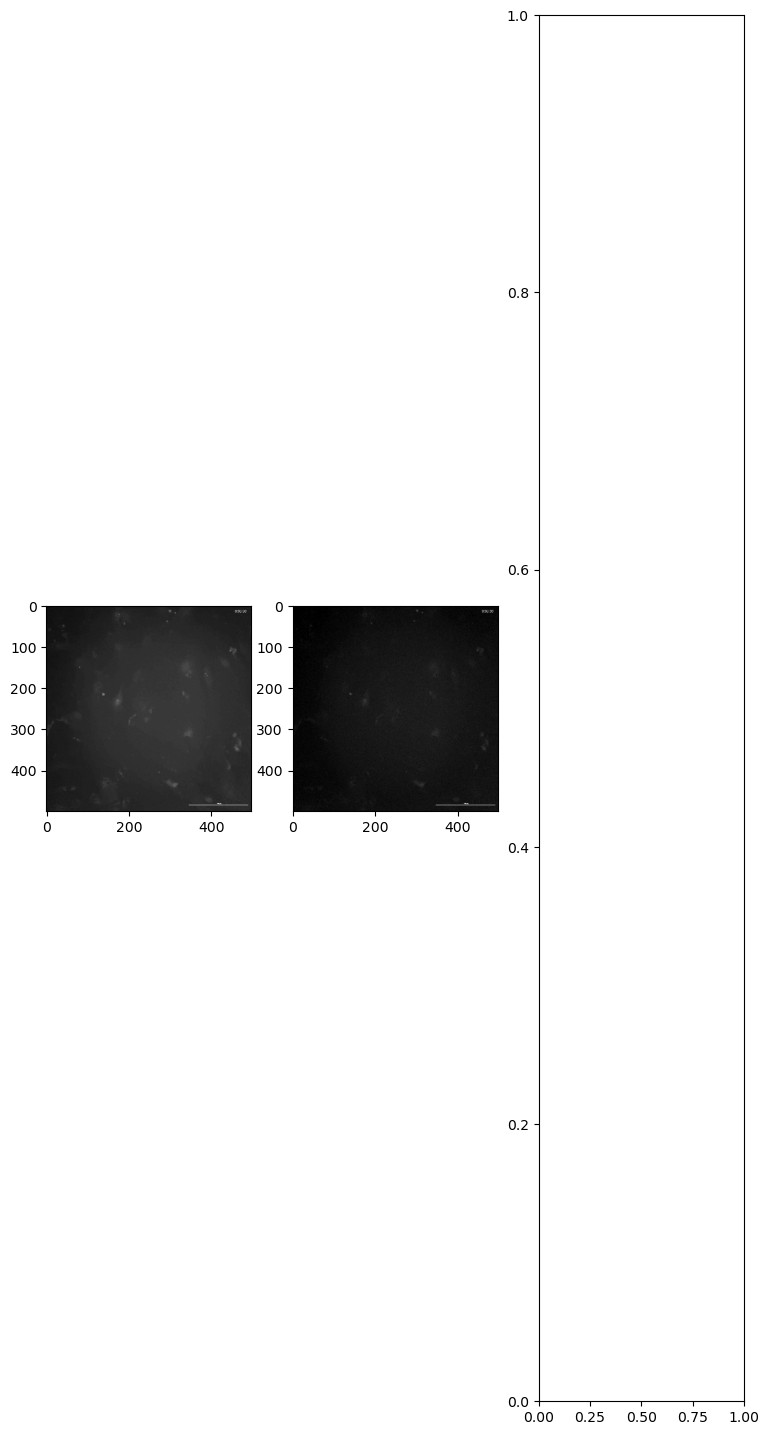

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(9,18))

# define vmin and max
vmin = np.min(movie_orig[0,:,:])
vmax = np.max(movie_orig[0,:,:])

# mid and end point
mid_idx = round(movie_orig.shape[0]/2)
end_idx = movie_orig.shape[1]-1

# scale data
ax[0].imshow(movie_orig[0,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[1].imshow(movie_orig[mid_idx,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[2].imshow(movie_orig[end_idx,:,:],cmap='gray',vmin=vmin,vmax=vmax)

# save fig
root_dir = os.path.split(fname)[0]
#fig.savefig(fname=os.path.join(root_dir,"photobleach.eps"),format='eps',dpi=1000)

#### Fit linear line to data

Text(0.5, 0, 'Time (samples)')

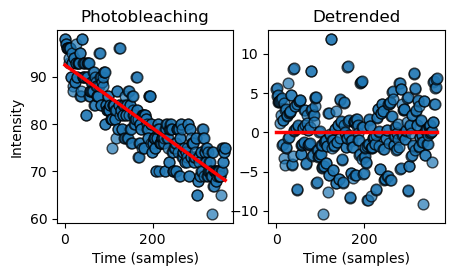

In [6]:
# example data
ex_pixel = movie_orig[:,400,400]
x = np.linspace(0,len(ex_pixel),len(ex_pixel))
y = ex_pixel

# plot data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (5, 2.5))
ax[0].scatter(x,y, s=60, alpha=0.7, edgecolors="k")
ax[0].set_title("Photobleaching")
ax[0].set_ylabel("Intensity")
ax[0].set_xlabel("Time (samples)")

# fit a linear regression line to the data
b, a = np.polyfit(x, y, deg=1)

# Plot regression line
ax[0].plot(x, a + b * x, color="r", lw=2.5)

from scipy.signal import detrend
detrended = detrend(y, type='linear')
b, a = np.polyfit(x, detrended, deg=1)

ax[1].scatter(x, detrended, s=60, alpha=0.7, edgecolors="k")
ax[1].plot(x, a + b * x, color="r", lw=2.5)

ax[1].set_title("Detrended")
ax[1].set_xlabel("Time (samples)")

#fig.savefig(fname=os.path.join(root_dir,"photobleach_scatter_nonlinear.eps"),format='eps')

Text(0.5, 0, 'Time (samples)')

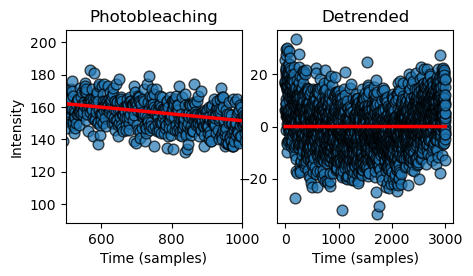

In [52]:
# example data
ex_pixel = movie_orig[:,400,400]
x = np.linspace(0,len(ex_pixel),len(ex_pixel))
y = ex_pixel

# plot data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (5, 2.5))
ax[0].scatter(x,y, s=60, alpha=0.7, edgecolors="k")
ax[0].set_title("Photobleaching")
ax[0].set_ylabel("Intensity")
ax[0].set_xlabel("Time (samples)")

# fit a linear regression line to the data
b, a = np.polyfit(x, y, deg=1)

# Plot regression line
ax[0].plot(x, a + b * x, color="r", lw=2.5)
ax[0].set_xlim([500,1000])

from scipy.signal import detrend
detrended = detrend(y, type='linear')
b, a = np.polyfit(x, detrended, deg=1)

ax[1].scatter(x, detrended, s=60, alpha=0.7, edgecolors="k")
ax[1].plot(x, a + b * x, color="r", lw=2.5)

ax[1].set_title("Detrended")
ax[1].set_xlabel("Time (samples)")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SSE: 196410.03665326285


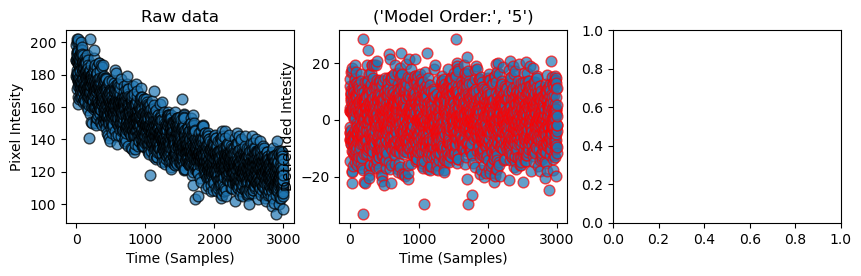

In [22]:
# get data
x = np.linspace(0,len(ex_pixel),len(ex_pixel))
y = movie_orig[:,400,400]

# sum of squared errors
model_order = 5
model = np.polyfit(x, y, model_order)
predicted = np.polyval(model, x)
sse = sum((y-predicted)**2)

# using sse, fit a model
print("SSE:",str(sse))
model = np.polyfit(x, y, model_order)
predicted = np.polyval(model, x)

# detrend
y_det = y-predicted

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10, 2.5))
ax[0].scatter(x,y,s=60, alpha=0.7, edgecolors="k")
ax[0].set_ylabel("Pixel Intesity")
ax[0].set_xlabel("Time (Samples)")
ax[0].set_title("Raw data")
ax[1].scatter(x,y_det,s=60,alpha=0.7,edgecolors="r")
ax[1].set_ylabel("Detrended Intesity")
ax[1].set_xlabel("Time (Samples)")
ax[1].set_title(("Model Order:",str(model_order)))

fig.savefig(fname=os.path.join(root_dir,"photobleach_scatter_sse.eps"),format='eps')

## Detrend data to photobleach correct

In [9]:
fname

'/Users/js0403/slice imaging/slice_imaging_spatDownSampledx2.tif'

In [4]:
movie_object = pu.modify_movie(movie_path = fname) # initiatlize the object
movie_object.photobleach_correction(save_movie=True,parameter_search=False) # photobleach correction

0.1926782273603083 % complete
0.3853564547206166 % complete
0.5780346820809248 % complete
0.7707129094412332 % complete
0.9633911368015413 % complete
1.1560693641618496 % complete
1.348747591522158 % complete
1.5414258188824663 % complete
1.7341040462427744 % complete
1.9267822736030826 % complete
2.119460500963391 % complete
2.312138728323699 % complete
2.5048169556840074 % complete
2.697495183044316 % complete
2.8901734104046244 % complete
3.0828516377649327 % complete
3.275529865125241 % complete
3.4682080924855487 % complete
3.6608863198458574 % complete
3.8535645472061653 % complete
4.046242774566474 % complete
4.238921001926782 % complete
4.431599229287091 % complete
4.624277456647398 % complete
4.8169556840077075 % complete
5.009633911368015 % complete
5.202312138728324 % complete
5.394990366088632 % complete
5.5876685934489405 % complete
5.780346820809249 % complete
5.973025048169557 % complete
6.165703275529865 % complete
6.358381502890173 % complete
6.551059730250482 % comple

## Reload data and plot results

In [5]:
movie_new = tifffile.memmap(movie_object.path_detrended)

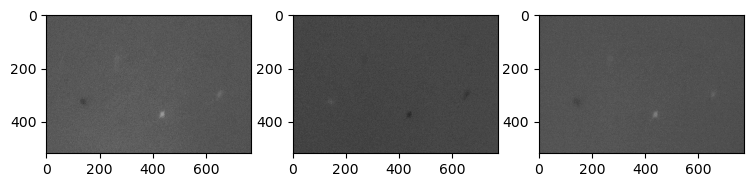

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(9,18))

# define vmin and max
vmin = np.min(movie_new[0,:,:])
vmax = np.max(movie_new[0,:,:])

# scale data
ax[0].imshow(movie_new[0,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[1].imshow(movie_new[1500,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[2].imshow(movie_new[2999,:,:],cmap='gray',vmin=vmin,vmax=vmax)

Text(0.5, 0, 'Time (samples)')

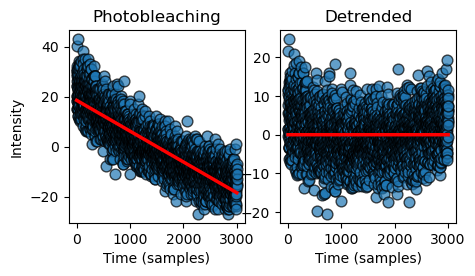

In [6]:
# example data
ex_pixel = movie_new[:,400,400]
x = np.linspace(0,len(ex_pixel),len(ex_pixel))
y = ex_pixel

# plot data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (5, 2.5))
ax[0].scatter(x,y, s=60, alpha=0.7, edgecolors="k")
ax[0].set_title("Photobleaching")
ax[0].set_ylabel("Intensity")
ax[0].set_xlabel("Time (samples)")

# fit a linear regression line to the data
b, a = np.polyfit(x, y, deg=1)

# Plot regression line
ax[0].plot(x, a + b * x, color="r", lw=2.5)

from scipy.signal import detrend
detrended = detrend(y, type='linear')
b, a = np.polyfit(x, detrended, deg=1)

ax[1].scatter(x, detrended, s=60, alpha=0.7, edgecolors="k")
ax[1].plot(x, a + b * x, color="r", lw=2.5)

ax[1].set_title("Detrended")
ax[1].set_xlabel("Time (samples)")

In [8]:
import caiman as cm
fname = r'/Users/js0403/slice imaging/slice_imaging_spatDownSampledx2_detrended.tif'
movie_orig = cm.load(fname)
#movie_orig = tifffile.imread(fname)
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=0.5,
                                              q_max=99.5, 
                                              fr=fr,
                                              plot_text=True,
                                              magnification=2,
                                              do_loop=True,
                                              backend='opencv')

In [4]:
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=0.5,
                                              q_max=99.5, 
                                              fr=fr,
                                              plot_text=True,
                                              magnification=2,
                                              do_loop=True,
                                              backend='opencv')

## The results from above, the method for detrending the data did not work

Now, I will attempt to take an average of the linear decay function, and subtract it from each pixel

In [ ]:
fname = r'/Users/js0403/slice imaging/slice_imaging_spatDownSampledx2.tif'
movie = tifffile.memmap(fname)

b, a = np.polyfit(x, detrended, deg=1)


# this is gonna SUCK
y_detrend = np.zeros(shape=movie.shape)
for rowi in range(movie.shape[1]):
    for coli in range(movie.shape[2]):
        # get all data in the temporal domain, pixel wise
        y = movie[:,rowi,coli]

        # create an x-variable to act as the IV (time or samples)
        #x = np.linspace(0,len(y),len(y))

        # detrend data using first order polynomial
        y_detrend[:,rowi,coli] = detrend(y, type='linear')
    print(((rowi+1)/movie.shape[1])*100,"% complete")